## Name and ID

Irina Mengqi Wang
1278675 / mwang17

## HW04 Code


You will complete the following notebook, as described in the PDF for Homework 04 (included in the download with the starter code).  You will submit:
1. This notebook file, along with your COLLABORATORS.txt file, to the Gradescope link for code.
2. A PDF of this notebook and all of its output, once it is completed, to the Gradescope link for the PDF.


Please report any questions to the [class Piazza page](piazza.com/tufts/spring2021/comp135).

#### Import required libraries

In [1]:
import os
import numpy as np
import pandas as pd
import time
import warnings

from sklearn.neural_network import MLPClassifier

from matplotlib import pyplot as plt
import seaborn as sns

from MLPClassifierWithSolverLBFGS import MLPClassifierLBFGS

from viz_tools_for_binary_classifier import plot_pretty_probabilities_for_clf

%matplotlib inline

#### Load data

In [2]:
# Load data
x_tr_N2 = np.loadtxt('data_xor/x_train.csv', skiprows=1, delimiter=',')
x_te_N2 = np.loadtxt('data_xor/x_test.csv', skiprows=1, delimiter=',')

y_tr_N = np.loadtxt('data_xor/y_train.csv', skiprows=1, delimiter=',')
y_te_N = np.loadtxt('data_xor/y_test.csv', skiprows=1, delimiter=',')

assert x_tr_N2.shape[0] == y_tr_N.shape[0]
assert x_te_N2.shape[0] == y_te_N.shape[0]

### Problem 1: MLP size [2] with activation ReLU and L-BFGS solver

In [3]:
n_runs = 16
tr_classifierLBFS = list()

for i in range(n_runs):
    start_time_sec = time.time()
    mlp_lbfgs = MLPClassifierLBFGS(
        hidden_layer_sizes=[2],
        activation='relu',
        alpha=0.0001,
        max_iter=200, tol=1e-6,
        random_state=i,
        )
    with warnings.catch_warnings(record=True) as warn_list:
        clf = mlp_lbfgs.fit(x_tr_N2, y_tr_N)
    elapsed_time_sec = time.time() - start_time_sec
    print('finished LBFGS run %2d/%d after %6.1f sec | %3d iters | %s | loss %.3f' % (
        i+1, n_runs, elapsed_time_sec,
        len(mlp_lbfgs.loss_curve_),
        'converged   ' if mlp_lbfgs.did_converge else 'NOT converged',
        mlp_lbfgs.loss_))
        
    tr_classifierLBFS.append(clf)

finished LBFGS run  1/16 after    0.0 sec |  29 iters | converged    | loss 0.347
finished LBFGS run  2/16 after    0.0 sec |  29 iters | converged    | loss 0.477
finished LBFGS run  3/16 after    0.0 sec |  21 iters | converged    | loss 0.347
finished LBFGS run  4/16 after    0.0 sec |  35 iters | converged    | loss 0.347
finished LBFGS run  5/16 after    0.0 sec |  29 iters | converged    | loss 0.347
finished LBFGS run  6/16 after    0.0 sec |  29 iters | converged    | loss 0.000
finished LBFGS run  7/16 after    0.0 sec |  23 iters | converged    | loss 0.000
finished LBFGS run  8/16 after    0.0 sec |  37 iters | converged    | loss 0.347
finished LBFGS run  9/16 after    0.0 sec |  15 iters | converged    | loss 0.347
finished LBFGS run 10/16 after    0.0 sec |  26 iters | converged    | loss 0.000
finished LBFGS run 11/16 after    0.0 sec |  36 iters | converged    | loss 0.347
finished LBFGS run 12/16 after    0.0 sec |  27 iters | converged    | loss 0.477
finished LBFGS r

#### 1 (a): Visualize probabilistic predictions in 2D feature space for ReLU + L-BFGS

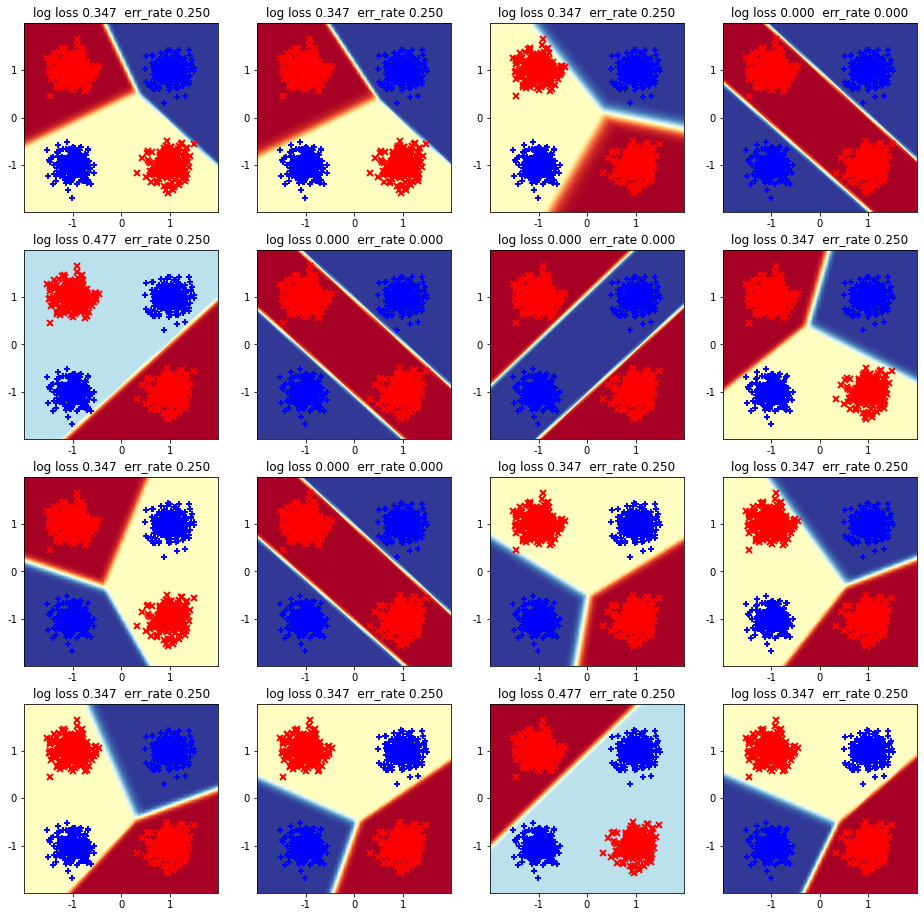

In [4]:
fig, ax_grid = plt.subplots(nrows=4, ncols=4, figsize=(16, 16))
for i in range(4):
    for j in range(4):
        plot_pretty_probabilities_for_clf(tr_classifierLBFS[i+j*4], x_tr_N2, y_tr_N, ax=ax_grid[i,j])

#### 1 (b): What fraction of runs reach 0 training error? What happens to the others? Describe how rapidly (or slowly) things seem to converge.

**Answer**: As shown above, 4/16 = 1/4 of the runs reach 0 training error. 

Others were able to separate some clusters  of the training data, while leaving the rest unclassified. Specifically, the rest shows a error rate at 0.25, which means 1/4 of the data was classified to the wrong class. 

Interestingly, we see the data being separated as blue, yellow, and red, such as the one on the bottom left corner has a log loss of 0.347. In this case, the red cluster in the yellow area were predicted of the probability of 0.5, which would be classfied correctly in the red class. And because of this, the model classified 3 out of 4 the clusters into its right class. 

In another case, the model that cover all three clusters in a blue area would contain have a log loss of 0.477. In this case, the blue clusters in the light blue area would be classfied correctly in the blue class. And because of this, the model classified 3 out of 4 the clusters into its right class. 

However, comparing the models of log loss 0.347 and 0.477, the former one would have a better result, since two were classfied correctly with a higher(or, more definite) probability. Therefore, these models have a smaller log loss, which normally would be considered as "better". 

In general, Models seem to converge pretty fast, requiring approximately only 30 iterations. 

### Problem 2: MLP size [2] with activation Logistic and L-BFGS solver


In [5]:
n_runs = 16
tr_classifierLog = list()

for i in range(n_runs):
    start_time_sec = time.time()
    mlp_lbfgs = MLPClassifierLBFGS(
        hidden_layer_sizes=[2],
        activation='logistic',
        alpha=0.0001,
        max_iter=200, tol=1e-6,
        random_state=i,
        )
    with warnings.catch_warnings(record=True) as warn_list:
        clf = mlp_lbfgs.fit(x_tr_N2, y_tr_N)
    elapsed_time_sec = time.time() - start_time_sec
    print('finished LBFGS run %2d/%d after %6.1f sec | %3d iters | %s | loss %.3f' % (
        i+1, n_runs, elapsed_time_sec,
        len(mlp_lbfgs.loss_curve_),
        'converged   ' if mlp_lbfgs.did_converge else 'NOT converged',
        mlp_lbfgs.loss_))
        
    tr_classifierLog.append(clf)

finished LBFGS run  1/16 after    0.0 sec |  58 iters | converged    | loss 0.000
finished LBFGS run  2/16 after    0.1 sec | 116 iters | converged    | loss 0.347
finished LBFGS run  3/16 after    0.0 sec |  45 iters | converged    | loss 0.347
finished LBFGS run  4/16 after    0.0 sec |  71 iters | converged    | loss 0.000
finished LBFGS run  5/16 after    0.0 sec |  40 iters | converged    | loss 0.477
finished LBFGS run  6/16 after    0.0 sec |  42 iters | converged    | loss 0.000
finished LBFGS run  7/16 after    0.0 sec |  50 iters | converged    | loss 0.000
finished LBFGS run  8/16 after    0.0 sec |  42 iters | converged    | loss 0.477
finished LBFGS run  9/16 after    0.0 sec |  62 iters | converged    | loss 0.347
finished LBFGS run 10/16 after    0.1 sec | 134 iters | converged    | loss 0.347
finished LBFGS run 11/16 after    0.1 sec |  92 iters | converged    | loss 0.347
finished LBFGS run 12/16 after    0.1 sec | 106 iters | converged    | loss 0.347
finished LBFGS r

#### 2 (a): Visualize probabilistic predictions in 2D feature space for Logistic Sigmoid + L-BFGS

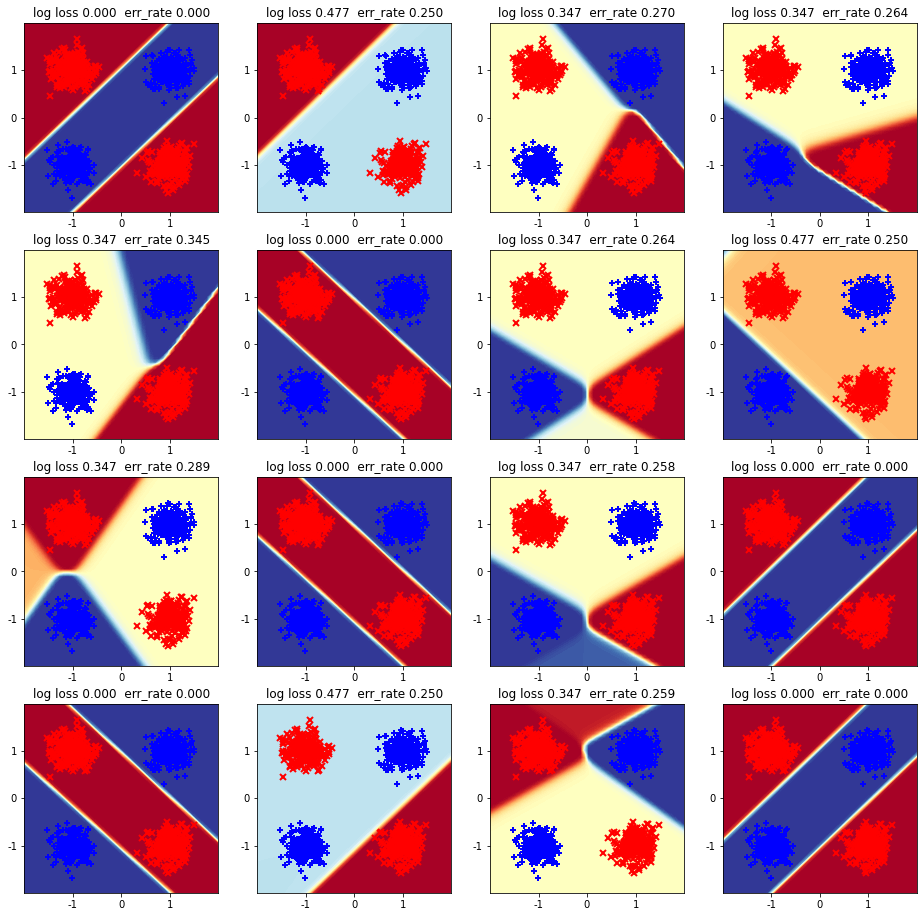

In [6]:
fig, ax_grid = plt.subplots(nrows=4, ncols=4, figsize=(16, 16))
for i in range(4):
    for j in range(4):
        plot_pretty_probabilities_for_clf(tr_classifierLog[i+j*4], x_tr_N2, y_tr_N, ax=ax_grid[i,j])

#### 2 (b): What fraction of runs reach 0 training error? What happens to the others? Describe how rapidly (or slowly) things seem to converge.

**Answer**: As shown above, 6/16 = 3/8 of the runs reach 0 training error. Others were able to separate some clusters of the training data, while leaving the rest unclassified. Specifically, the rest shows a error rate at from 0.25-0.345 and a log loss from 0.347 or 0.477, meaning that some data were classified to the wrong class. 

Similar to what's being explained above, others were able to separate some clusters  of the training data, while leaving the rest unclassified. Specifically, the rest shows a error rate at 0.25, which means 1/4 of the data was classified to the wrong class. 

Interestingly, we see the data being separated as blue, yellow, and red, such as the one on the bottom left corner has a log loss of 0.347. In this case, the red cluster in the yellow area were predicted of the probability of 0.5, which would be classfied correctly in the red class. And because of this, the model classified 3 out of 4 the clusters into its right class. 

In another case, the model that cover all three clusters in a blue area would contain have a log loss of 0.477. In this case, the blue clusters in the light blue area would be classfied correctly in the blue class. And because of this, the model classified 3 out of 4 the clusters into its right class. 

However, comparing the models of log loss 0.347 and 0.477, the former one would have a better result, since two were classfied correctly with a higher(or, more definite) probability. Therefore, these models have a smaller log loss, which normally would be considered as "better". 
The speed of convergence varies based on the random_state: some of the models converge pretty fast with around 60 iterations, while some takes over 100 iterations to converge. In general, it's slower than using ReLU as the activation function. 

### Problem 3: MLP size [2] with activation ReLU and SGD solver

In [7]:
n_runs = 16
tr_classifierLBFS_SGD = list()

for i in range(n_runs):
    start_time_sec = time.time()
    mlp_sgd = MLPClassifier(
        hidden_layer_sizes=[2],
        activation='relu',
        alpha=0.0001,
        max_iter=400, tol=1e-8,
        random_state=i,
        solver='sgd', batch_size=10,
        learning_rate='adaptive', learning_rate_init=0.1, momentum=0.0,
        )
    with warnings.catch_warnings(record=True) as warn_list:
        clf = mlp_sgd.fit(x_tr_N2, y_tr_N)
    mlp_sgd.did_converge = True if len(warn_list) == 0 else False
    elapsed_time_sec = time.time() - start_time_sec
    print('finished SGD run %2d/%d after %6.1f sec | %3d epochs | %s | loss %.3f' % (
        i+1, n_runs, elapsed_time_sec,
        len(mlp_sgd.loss_curve_),
            'converged    ' if mlp_sgd.did_converge else 'NOT converged',
            mlp_sgd.loss_))

    tr_classifierLBFS_SGD.append(clf)

finished SGD run  1/16 after    7.4 sec | 267 epochs | converged     | loss 0.347
finished SGD run  2/16 after    8.5 sec | 307 epochs | converged     | loss 0.478
finished SGD run  3/16 after    6.6 sec | 239 epochs | converged     | loss 0.347
finished SGD run  4/16 after   11.0 sec | 400 epochs | NOT converged | loss 0.001
finished SGD run  5/16 after    7.7 sec | 275 epochs | converged     | loss 0.347
finished SGD run  6/16 after   11.5 sec | 400 epochs | NOT converged | loss 0.001
finished SGD run  7/16 after   11.1 sec | 400 epochs | NOT converged | loss 0.001
finished SGD run  8/16 after    7.4 sec | 273 epochs | converged     | loss 0.347
finished SGD run  9/16 after    5.9 sec | 219 epochs | converged     | loss 0.347
finished SGD run 10/16 after   10.7 sec | 400 epochs | NOT converged | loss 0.001
finished SGD run 11/16 after   10.7 sec | 394 epochs | converged     | loss 0.478
finished SGD run 12/16 after   11.0 sec | 400 epochs | NOT converged | loss 0.478
finished SGD run

#### 3 (a): Visualize probabilistic predictions in 2D feature space for ReLU + SGD

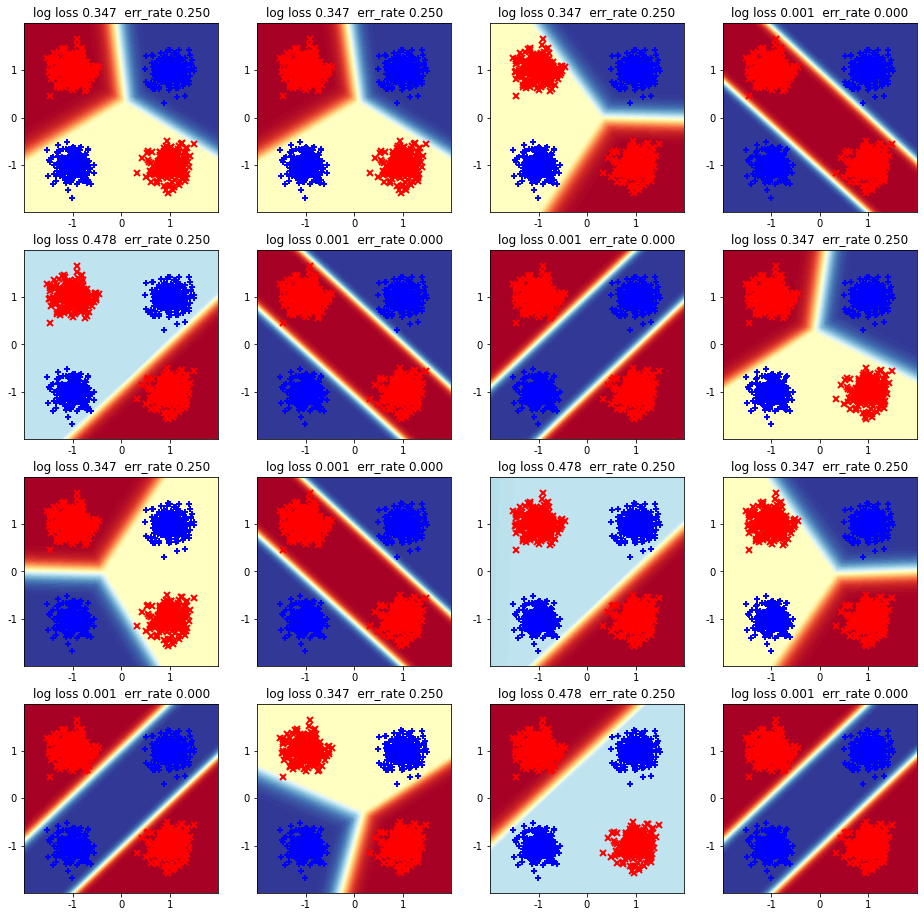

In [8]:
fig, ax_grid = plt.subplots(nrows=4, ncols=4, figsize=(16, 16))
for i in range(4):
    for j in range(4):
        plot_pretty_probabilities_for_clf(tr_classifierLBFS_SGD[i+j*4], x_tr_N2, y_tr_N, ax=ax_grid[i,j])

#### 3 (b): What fraction of runs reach 0 training error? What happens to the others? Describe how rapidly (or slowly) things seem to converge.

**Answer**: As shown above, 6/16 = 3/8 of the runs reach 0 training error. Others were able to separate some clusters of the training data, while leaving the rest unclassified. Once again as seen and explained for question 1, their training errors are 0.250. The speed of convergence were slower, taking around 300 iterations(around 6s) to converge. In general, it's much more slower than those without using the SGD, not to mention some fail to converge after 400 iterations ( around 10s).  

#### 3 (c): What is most noticeably different between SGD with batch size 10 and the previous L-BFGS in part 1 (using the same ReLU activation function)?  Why, do you believe, these differences exist?

**Answer**: The most noticeable difference using SGD is how the model fail to converge, and the classifiers begin to take more time and iterations to converge. Also, the loss can get very low, but didn't get to 0.  This emphasizes a point that's discussed in lecture and in class, that is stochastic gradient descent only looks at a small portion of the data ---- in this case, size 10---- so the gradient isn't as accurate as the case when we are using batch gradient descent that computes the gradient using the whole dataset. As a result, we may need to tune the learning rates and steps that helps it converge since it can get stuck in the local minimum.


### Problem 4: MLP size [2] with activation Logistic and SGD solver

In [9]:
n_runs = 16
tr_classifierLOG_SGD = list()

for i in range(n_runs):
    start_time_sec = time.time()
    mlp_sgd = MLPClassifier(
        hidden_layer_sizes=[2],
        activation='logistic',
        alpha=0.0001,
        max_iter=400, tol=1e-8,
        random_state=i,
        solver='sgd', batch_size=10,
        learning_rate='adaptive', learning_rate_init=0.1, momentum=0.0,
        )
    with warnings.catch_warnings(record=True) as warn_list:
        clf = mlp_sgd.fit(x_tr_N2, y_tr_N)
    mlp_sgd.did_converge = True if len(warn_list) == 0 else False
    elapsed_time_sec = time.time() - start_time_sec
    print('finished SGD run %2d/%d after %6.1f sec | %3d epochs | %s | loss %.3f' % (
        i+1, n_runs, elapsed_time_sec,
        len(mlp_sgd.loss_curve_),
            'converged    ' if mlp_sgd.did_converge else 'NOT converged',
            mlp_sgd.loss_))

    tr_classifierLOG_SGD.append(clf)

finished SGD run  1/16 after    4.0 sec | 161 epochs | converged     | loss 0.693
finished SGD run  2/16 after    9.7 sec | 400 epochs | NOT converged | loss 0.005
finished SGD run  3/16 after    9.8 sec | 400 epochs | NOT converged | loss 0.005
finished SGD run  4/16 after    5.2 sec | 215 epochs | converged     | loss 0.693
finished SGD run  5/16 after    9.6 sec | 400 epochs | NOT converged | loss 0.351
finished SGD run  6/16 after    9.6 sec | 400 epochs | NOT converged | loss 0.005
finished SGD run  7/16 after    9.9 sec | 400 epochs | NOT converged | loss 0.005
finished SGD run  8/16 after    9.7 sec | 400 epochs | NOT converged | loss 0.351
finished SGD run  9/16 after    9.8 sec | 400 epochs | NOT converged | loss 0.351
finished SGD run 10/16 after    9.8 sec | 400 epochs | NOT converged | loss 0.351
finished SGD run 11/16 after    3.1 sec | 124 epochs | converged     | loss 0.693
finished SGD run 12/16 after   10.0 sec | 400 epochs | NOT converged | loss 0.005
finished SGD run

#### 4(a): Visualize probabilistic predictions in 2D feature space for Logistic + SGD

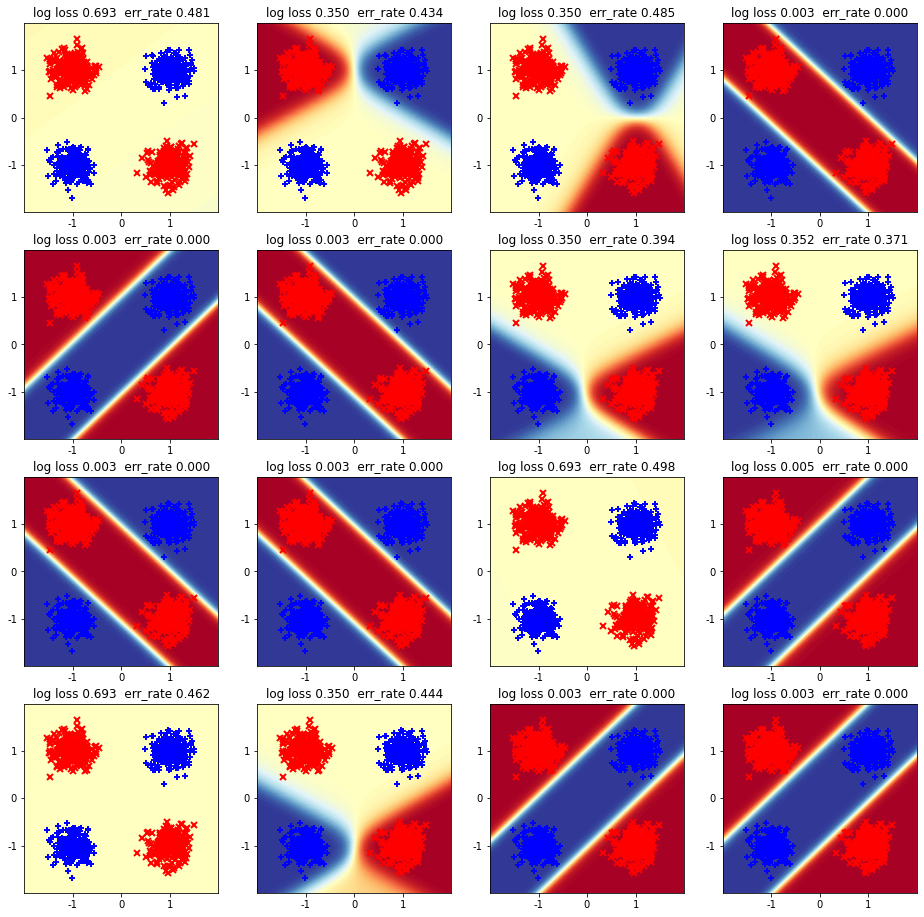

In [10]:
fig, ax_grid = plt.subplots(nrows=4, ncols=4, figsize=(16, 16))
for i in range(4):
    for j in range(4):
        plot_pretty_probabilities_for_clf(tr_classifierLOG_SGD[i+j*4], x_tr_N2, y_tr_N, ax=ax_grid[i,j])

#### 4 (b): What fraction of runs reach 0 training error? What happens to the others? Describe how rapidly (or slowly) things seem to converge.

**Answer**: As shown above, 8/16 = 1/2 of the runs reach 0 training error. Some of the others were only able to separate some clusters of the training data, while the others weren't able to separate anything at all. In general, these models that did not reach 0 training errorhave error rates between 0.371 and 0.498. The speed of convergence were very slow, and only 3 of the 16 models actually converged. They take around 4 seconds, while the rest that do not converge take around 10 seconds. In general, it's much more slower than any of the method tried above.  

#### 4 (c): What is most noticeably different between SGD with batch size 10 and the previous L-BFGS runs in part 2 (using the same logistic activation function)?  Why, do you believe, these differences exist?

**Answer**: Similar to the previous comparison, the most noticeable difference using SGD is how the model fail to converge and the classifiers take more time and iterations even for those that converge. The error rate is lower, and the loss can get very low, but didn't get to 0. This can be explained using a similar point that's discussed in lecture, class, and the previous question, that is stochastic gradient descent only looks at a small portion of the data ---- in this case, size 10---- so the gradient isn't as accurate as the case when we are using batch gradient descent that computes the gradient using the whole dataset. As a result, we may need to tune the learning rates and steps that helps it converge since it can get stuck in the local minimum.

### Problem 5: Comparing loss_curves

#### 5 (a): Plot loss_curves for each method in 2 x 2 subplot grid

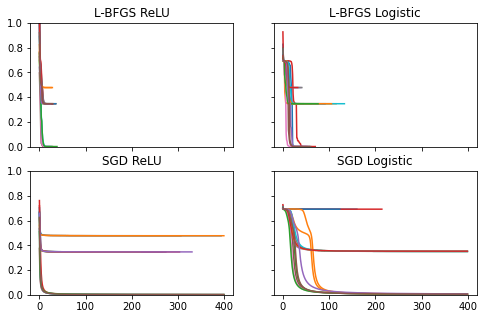

In [11]:
fig, ax_grid = plt.subplots(nrows=2, ncols=2, sharex=True, sharey=True, figsize=(8,5))

for i in range(16):
    ax_grid[0,0].plot(tr_classifierLBFS[i].loss_curve_)
    ax_grid[0,1].plot(tr_classifierLog[i].loss_curve_)
    ax_grid[1,0].plot(tr_classifierLBFS_SGD[i].loss_curve_)
    ax_grid[1,1].plot(tr_classifierLOG_SGD[i].loss_curve_)

ax_grid[0,0].set_title('L-BFGS ReLU')
ax_grid[0,1].set_title('L-BFGS Logistic')
    
ax_grid[1,0].set_title('SGD ReLU')
ax_grid[1,1].set_title('SGD Logistic')
plt.ylim([0, 1.0]); # keep this y limit so it's easy to compare across plots

#### 5 (b): From this overview plot (plus your detailed plots from prior steps), which activation function seems easier to optimize, the ReLU or the Logistic Sigmoid?  Which requires most iterations in general?

**Answer:** Comparing the result, it's easier to optimize when using ReLU as the activation function. As show in the detailed plots in the prior steps, a majority of the loss curve immediately die down within 100 iterations and gives a smaller loss compared to the logistic sigmoid. In our attempt, we can also tell from the graph that logistic requires the most iterations, as the loss decreases slower. 

#### 5 (c): Are you convinced that one activation function is always easier to optimize? Suggest 3 additional experimental comparisons that would be informative.

**Answer**: No. I'm not convinced. Although our result reveals that one outperforms the other under controlled conditions. I think these controlled conditions could also affect the speed of convergence and error/loss rate. Also, we are only testing on training data, and the result may be different on testing data. Thus, I believe we should try other things, 
For example
- Try different data set with different patterns and compare between the two
- Try using different learning rate and hyperparameters
- Try using these two activation functions on other machine learning algorithms.
